In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data['Type'] = 'train'
test_data['Type'] = 'test'

In [3]:
explr_data = train_data.append(test_data)

c:\users\vikrant\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
explr_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


In [5]:
n_row = explr_data.shape[0]
for col in explr_data.columns:
    print(col, explr_data[col].isna().sum()/n_row*100)

Age 20.091673032849503
Cabin 77.46371275783041
Embarked 0.15278838808250572
Fare 0.07639419404125286
Name 0.0
Parch 0.0
PassengerId 0.0
Pclass 0.0
Sex 0.0
SibSp 0.0
Survived 31.932773109243694
Ticket 0.0
Type 0.0


In [6]:
explr_data = explr_data.drop(columns=['Cabin'])

In [7]:
explr_data['Sex'] = explr_data['Sex'].replace('male', 1).replace('female', 0)

In [8]:
explr_data['family_size'] = explr_data['Parch'] + explr_data['SibSp'] + 1

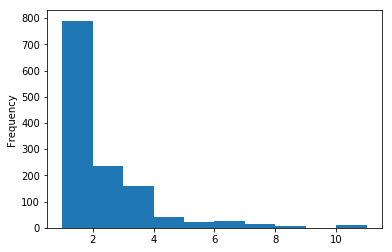

In [9]:
explr_data['family_size'].plot(kind='hist')

In [10]:
explr_data['family'] = 'Alone'
explr_data.loc[explr_data['family_size'] > 1, 'family'] = 'Small'
explr_data.loc[explr_data['family_size'] > 4, 'family'] = 'Big'

In [11]:
explr_data = explr_data.drop(columns=['Parch', 'SibSp', 'family_size'])

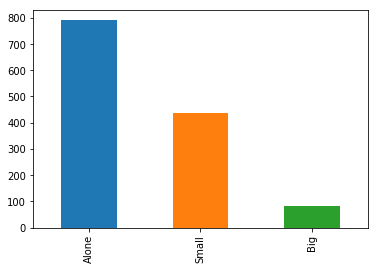

In [12]:
explr_data['family'].value_counts().plot(kind='bar')

In [13]:
explr_data = pd.concat([explr_data, pd.get_dummies(explr_data['family'], drop_first=True)], axis=1)
explr_data = explr_data.drop(['family'], axis=1) 

In [14]:
explr_data['Title'] = explr_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)
explr_data = explr_data.drop('Name', axis=1)

In [15]:
mapping = {'Mlle': 'Miss', 
           'Ms': 'Miss', 
           'Mme': 'Mrs',
           'Major': 'Other', 
           'Col': 'Other', 
           'Dr' : 'Other', 
           'Rev' : 'Other',
           'Capt': 'Other', 
           'Jonkheer': 'Royal',
           'Sir': 'Royal', 
           'Lady': 'Royal', 
           'Don': 'Royal',
           'Countess': 'Royal', 
           'Dona': 'Royal'}
explr_data.replace({'Title': mapping}, inplace=True)
titles = ['Miss', 'Mr', 'Mrs', 'Royal', 'Other', 'Master']

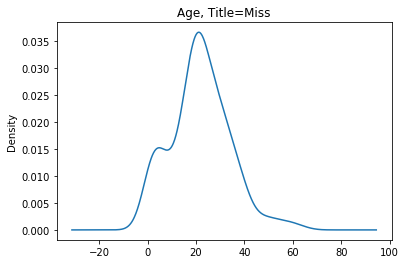

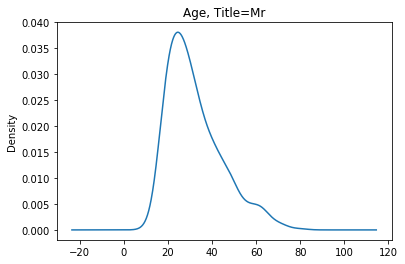

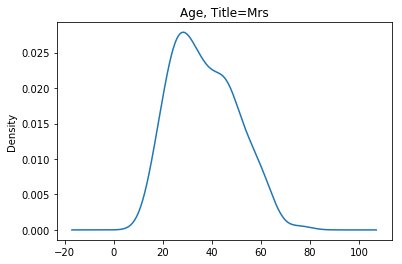

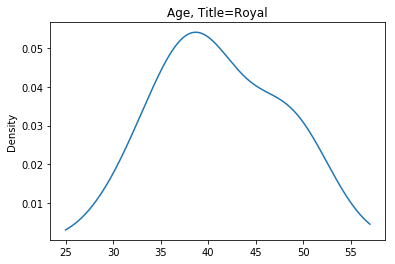

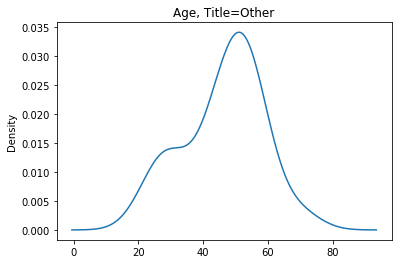

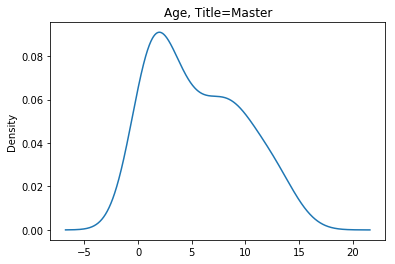

In [16]:
for title in titles:
    explr_data.loc[explr_data['Title'] == title, 'Age'].plot(kind='density', title='Age, Title='+title)
    plt.show()

In [17]:
median_age = explr_data[['Age', 'Title']].groupby(['Title']).median()

In [18]:
age_mask = explr_data['Age'].isna()
explr_data.loc[age_mask, 'Age'] = median_age.loc[explr_data.loc[age_mask, 'Title'], 'Age'].tolist()

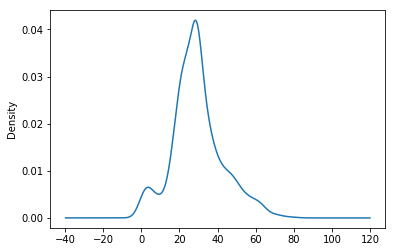

In [19]:
explr_data['Age'].plot(kind='density')

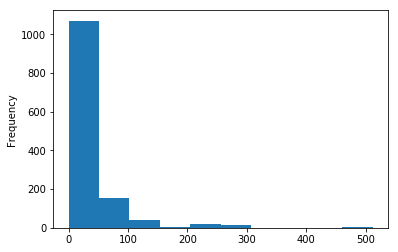

In [20]:
explr_data['Fare'].plot(kind='hist')

In [21]:
avg_fare = explr_data.loc[explr_data['Pclass'] == 3, 'Fare'].mean()

In [22]:
explr_data.loc[explr_data['Fare'].isna(), 'Fare'] = avg_fare

In [23]:
n_row = explr_data.shape[0]
for col in explr_data.columns:
    print(col, explr_data[col].isna().sum()/n_row*100)

Age 0.0
Embarked 0.15278838808250572
Fare 0.0
PassengerId 0.0
Pclass 0.0
Sex 0.0
Survived 31.932773109243694
Ticket 0.0
Type 0.0
Big 0.0
Small 0.0
Title 0.0


In [24]:
explr_data.loc[:, 'Child'] = 1
explr_data.loc[explr_data['Age']>=18, 'Child'] = 0

In [25]:
explr_data = explr_data.drop(['Age'], axis=1)

In [26]:
explr_data.head()

,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Type,Big,Small,Title,Child
0,S,7.2500,1,3,1,0.0,A/5 21171,train,0,1,Mr,0
1,C,71.2833,2,1,0,1.0,PC 17599,train,0,1,Mrs,0
2,S,7.9250,3,3,0,1.0,STON/O2. 3101282,train,0,0,Miss,0
3,S,53.1000,4,1,0,1.0,113803,train,0,1,Mrs,0
4,S,8.0500,5,3,1,0.0,373450,train,0,0,Mr,0


In [27]:
explr_data = explr_data.drop(['Title', 'Ticket'], axis=1)

In [28]:
embarked_dummy = pd.get_dummies(explr_data['Embarked'], drop_first=True)
explr_data = pd.concat([explr_data, embarked_dummy], axis=1)

In [29]:
train_data = explr_data.loc[explr_data['Type'] == 'train',]
test_data = explr_data.loc[explr_data['Type'] == 'test',]

In [30]:
train_data = train_data.drop(['Type', 'Embarked'],axis=1)
test_data = test_data.drop(['Type', 'Embarked'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

In [32]:
train_col_list = ['Fare', 'Pclass', 'Sex', 'Big', 'Small', 'Child', 'Q', 'S']

In [33]:
X_train, X_val, y_train, y_val = train_test_split(train_data[train_col_list], train_data['Survived'], test_size=0.2)

## RandomForestClassifier

In [41]:
model1 = RandomForestClassifier(random_state=2, min_samples_leaf=10)
model1.fit(X_train, y_train)
print(accuracy_score(y_val, model1.predict(X_val)))

0.7486033519553073


c:\users\vikrant\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


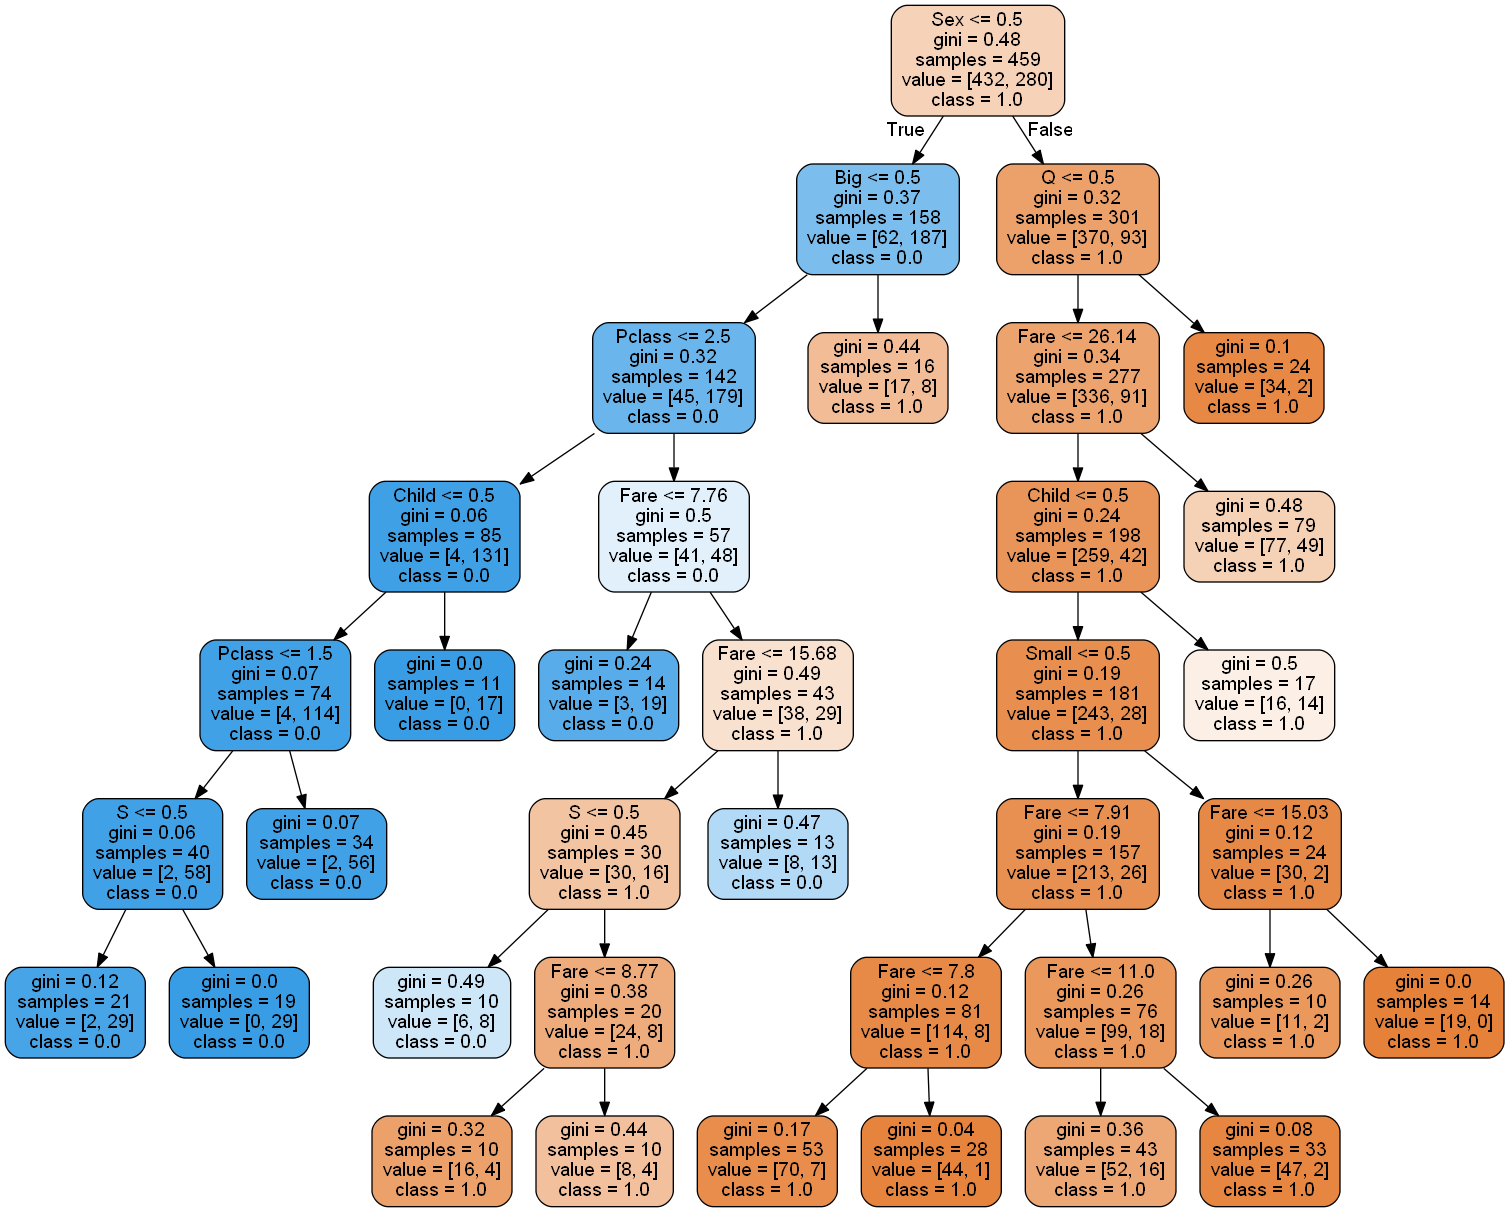

In [42]:
export_graphviz(model1.estimators_[5], out_file='tree.dot',
               feature_names=X_train.columns,
               class_names=list(y_train.unique().astype(str)),
               rounded=True, proportion=False,
               precision=2, filled=True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])
Image(filename='tree.png')

In [55]:
model1.fit(X_val[train_col_list], y_val)
y_pred = pd.Series(data=model1.predict(test_data[train_col_list]).astype(int), name='Survived')
rfc_submission = pd.concat([test_data['PassengerId'], y_pred], axis=1)
rfc_submission.to_csv('rfc_submission.csv', index=False)

In [36]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
print(accuracy_score(y_val, model2.predict(X_val)))

0.7597765363128491


c:\users\vikrant\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
